In [15]:
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc
from pathlib import Path
import json

import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import colormaps

In [ ]:
# dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251009/results/')
# subdirs = [p for p in dir.iterdir() if p.is_dir()]
# cases = [p.stem for p in subdirs]

# cases, subdirs = zip(*sorted(zip(cases, subdirs)))
# cases = list(cases)
# subdirs = list(subdirs)

In [6]:
cases

['case0_DPneg',
 'case0_DPpos',
 'case1_DPneg',
 'case1_DPpos',
 'case2_DPneg',
 'case2_DPpos',
 'case3_DPneg',
 'case3_DPpos',
 'case4_DPneg',
 'case4_DPpos',
 'case5_DPneg',
 'case5_DPpos',
 'case6_DPneg',
 'case6_DPpos',
 'case6_bis_DPneg',
 'case6_bis_DPpos',
 'case7_1000part_DPneg',
 'case7_1000part_DPpos',
 'case7_DPneg',
 'case7_DPpos',
 'orbit_shifts']

In [3]:
def df_to_delta(df):
    sps_gtr = 17.95
    sps_g0 = 27.643
    f0 = 200e6
    eta = 1/sps_gtr**2 - 1/sps_g0**2
    return -df/(f0*eta)

In [4]:
def interpolate_50_val(xvals, yvals):
    if np.any(yvals <= 0.5):  # ensure the curve actually crosses 0.5
        idx_above = np.where(yvals > 0.5)[0][-1]   # last index above 0.5
        idx_below = idx_above + 1                  # first index below 0.5

        # Linear interpolation for more accuracy
        x50 = np.interp(0.5, [yvals[idx_above], yvals[idx_below]],
                            [xvals[idx_above], xvals[idx_below]])
        return x50
    else:
        print("Warning: The curve does not cross 0.5")
        return None

main_bottlenecks_qdshifts_1000part_DPneg: delta_50 = -6.591e-3
main_bottlenecks_qdshifts_1000part_DPpos: delta_50 = 6.928e-3
main_bottlenecks_qdshifts_3_2mm_1000part_DPneg: delta_50 = -6.437e-3
main_bottlenecks_qdshifts_3_2mm_1000part_DPpos: delta_50 = 6.872e-3


/var/folders/b5/swvf1qzj6l36gcd1zzs4_g8h0000gn/T/ipykernel_44696/4023199789.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


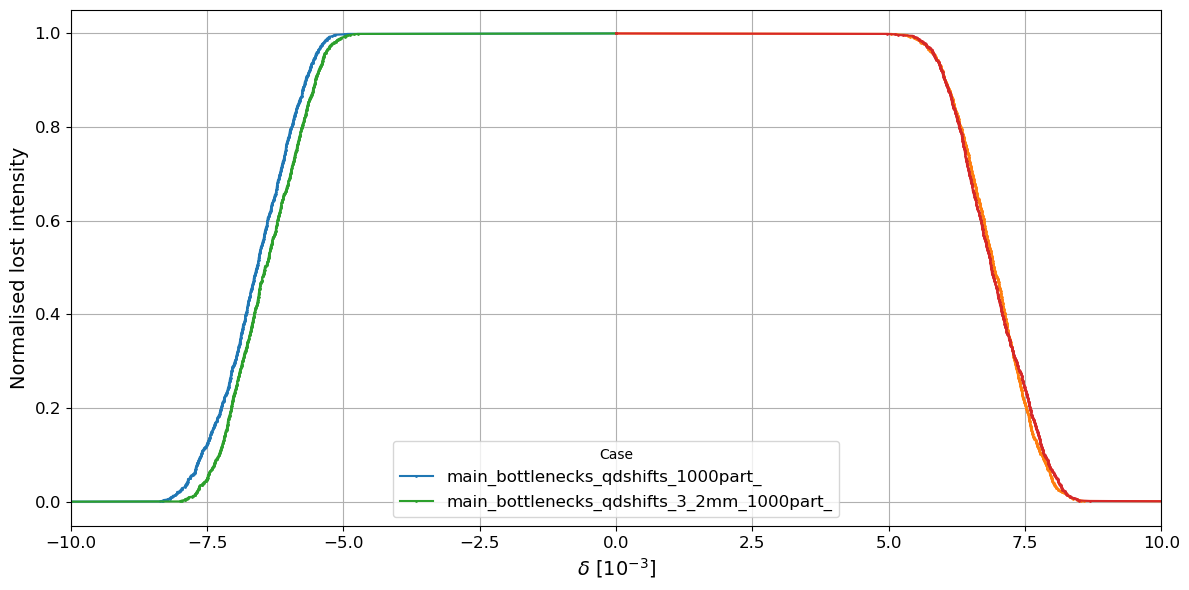

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251009/results/orbit_shifts/')
subdirs = [p for p in dir.iterdir() if p.is_dir()]
subdirs.append(Path('/Users/lisepauwels/sps_simulations/Prototyping/20251015/results/main_bottlenecks_qdshifts_3_2mm_1000part_DPneg/'))
subdirs.append(Path('/Users/lisepauwels/sps_simulations/Prototyping/20251015/results/main_bottlenecks_qdshifts_3_2mm_1000part_DPpos/'))
cases = [p.stem for p in subdirs]

cases, subdirs = zip(*sorted(zip(cases, subdirs)))
cases = list(cases)
subdirs = list(subdirs)
# Extract unique base names (without DPneg/DPpos)
base_names = []
for case in cases:
    base_name = case.replace('DPneg', '').replace('DPpos', '')
    if base_name not in base_names:
        base_names.append(base_name)

# Sample colors evenly from the plasma colormap
cmap = cm.get_cmap('plasma')
colors = {base: cmap(i / len(base_names) * 0.8 + 0.1) for i, base in enumerate(base_names)}
colors = {base: cmap(i / 5) for i, base in enumerate(base_names)}

for case, subdir in zip(cases, subdirs):
    if 'main' in case and '1000part' in case:
        with open(subdir / f'IntensityLoss_{case}.json', 'r') as fid:
            input_data[case] = json.load(fid)

        turns = list(input_data[case].keys())
        num_particles = input_data[case]['num_particles']
        sweep_per_turn = input_data[case]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[case][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        # Pick color based on base case name
        base_name = case.replace('DPneg', '').replace('DPpos', '')
        color = colors[base_name]

        ax.plot(
            deltas * 1e3,
            1 - np.cumsum(counts) / num_particles,
            marker='o',
            markersize=1,
            label=base_name if 'DPneg' in case else None,  # label once
            #color=color,
        )

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3
        print(f'{case}: delta_50 = {val_50:.3f}e-3')
        delta_50_vals[case] = float(val_50)

ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 10)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()


Clear effect in momentum acceptance, so maybe good to investigate a more realistic scheme

# MD orbit plots

orbit_md: delta_50 = -6.262e-3
orbit_md: delta_50 = 6.685e-3
orbit_md_apershift_1mm: delta_50 = -6.446e-3
orbit_md_apershift_1mm: delta_50 = 6.630e-3
orbit_md_apershift_2mm: delta_50 = -6.396e-3
orbit_md_apershift_2mm: delta_50 = 6.752e-3
orbit_md_apershift_3_2_3mm_v3: delta_50 = -6.348e-3
orbit_md_apershift_3_2_3mm_v3: delta_50 = 6.766e-3
orbit_md_apershift_4_3_4mm_v2: delta_50 = -6.106e-3
orbit_md_apershift_4_3_4mm_v2: delta_50 = 6.738e-3
orbit_md_apershift_4_3_4mm_v3: delta_50 = -6.125e-3
orbit_md_apershift_4_3_4mm_v3: delta_50 = 6.713e-3


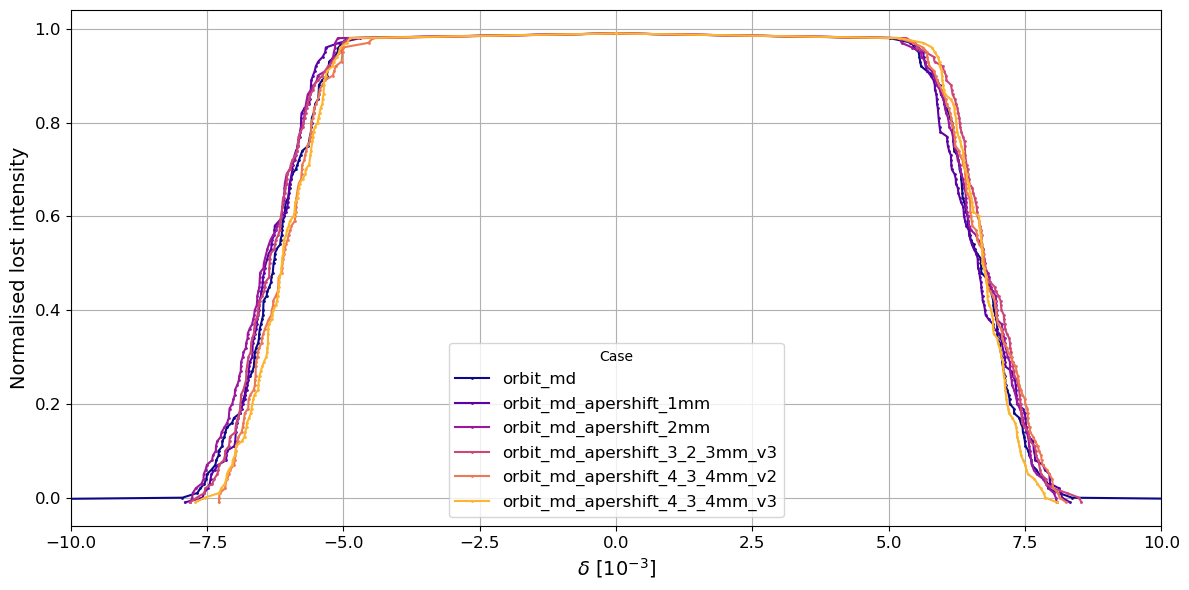

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251015/results/')
subdirs = [p for p in dir.iterdir() if p.is_dir() and 'orbit' in p.stem and '1000part' not in p.stem]

cases = [p.stem for p in subdirs]

cases, subdirs = zip(*sorted(zip(cases, subdirs)))
cases = list(cases)
subdirs = list(subdirs)


cmap = colormaps['plasma']
colors = {base: cmap(i / len(cases)) for i, base in enumerate(cases)}

for case, subdir in zip(cases, subdirs):
    input_data[case] = {}
    color = colors[case]
    for plane in ['DPneg', 'DPpos']:
        with open(subdir / plane / f'IntensityLoss_{case}.json', 'r') as fid:
            input_data[case][plane] = json.load(fid)

        turns = list(input_data[case][plane].keys())
        num_particles = input_data[case][plane]['num_particles']
        sweep_per_turn = input_data[case][plane]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[case][plane][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        if plane == 'DPneg':
            label = case
        else:
            label = None
        ax.plot(
            deltas * 1e3,
            1 - np.cumsum(counts) / num_particles,
            marker='o',
            markersize=1,
            label=label,
            color=color,
        )

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3
        print(f'{case}: delta_50 = {val_50:.3f}e-3')
        delta_50_vals[case] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 10)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()

# Other plots main bottlenecks with qd shifts

main_bottlenecks_qdshifts_3_1mm DPneg: delta_50 = -6.532e-3
main_bottlenecks_qdshifts_3_1mm DPpos: delta_50 = 6.964e-3
main_bottlenecks_qdshifts_3_2_2mm DPneg: delta_50 = -6.320e-3
main_bottlenecks_qdshifts_3_2_2mm DPpos: delta_50 = 6.933e-3
main_bottlenecks_qdshifts_4_2_3mm DPneg: delta_50 = -6.251e-3
main_bottlenecks_qdshifts_4_2_3mm DPpos: delta_50 = 6.841e-3


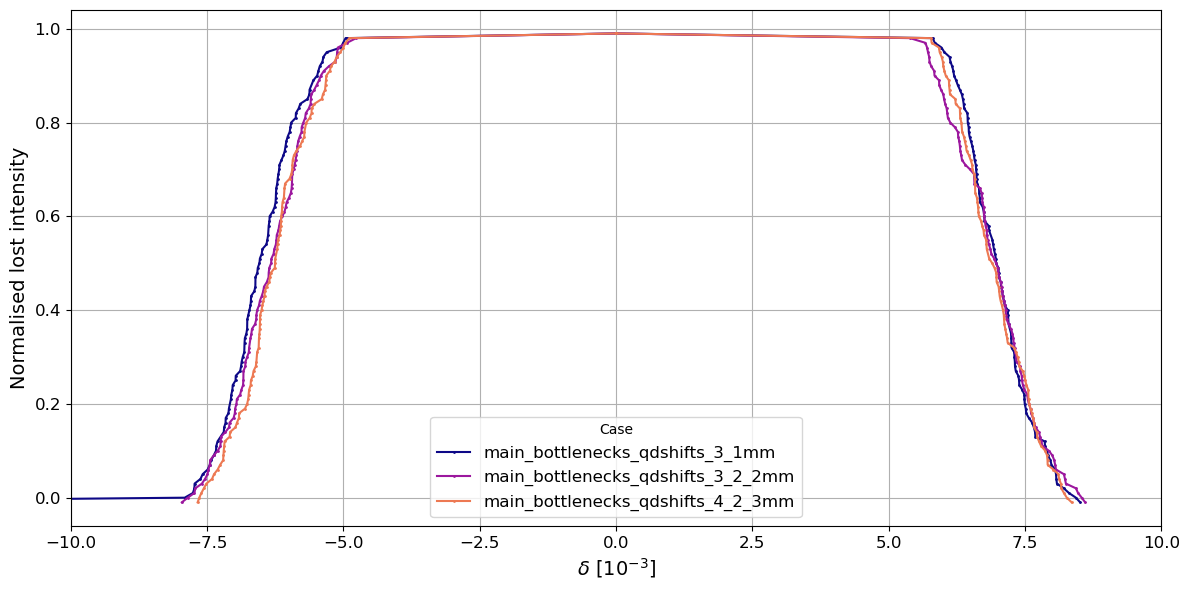

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

input_data = {}
delta_50_vals = {}

dir = Path('/Users/lisepauwels/sps_simulations/Prototyping/20251015/results/')
subdirs = [p for p in dir.iterdir() if p.is_dir() and 'qdshifts' in p.stem and '1000part' not in p.stem]

cases = [p.stem for p in subdirs]

cases, subdirs = zip(*sorted(zip(cases, subdirs)))
cases = list(cases)
subdirs = list(subdirs)


cmap = colormaps['plasma']
colors = {base: cmap(i / len(cases)) for i, base in enumerate(cases)}

for case, subdir in zip(cases, subdirs):
    input_data[case] = {}
    color = colors[case]
    for plane in ['DPneg', 'DPpos']:
        with open(subdir / plane / f'IntensityLoss_{case}.json', 'r') as fid:
            input_data[case][plane] = json.load(fid)

        turns = list(input_data[case][plane].keys())
        num_particles = input_data[case][plane]['num_particles']
        sweep_per_turn = input_data[case][plane]['sweep_per_turn']
        turns.remove('num_particles')
        turns.remove('sweep_per_turn')

        turns = np.array(turns, dtype=int)
        deltas = df_to_delta(sweep_per_turn * turns)
        deltas = np.concatenate((np.array([0]), deltas))
        counts = np.array([input_data[case][plane][str(turn)] for turn in turns], dtype=int)
        counts = np.concatenate((np.array([1]), counts))

        if plane == 'DPneg':
            label = case
        else:
            label = None
        ax.plot(
            deltas * 1e3,
            1 - np.cumsum(counts) / num_particles,
            marker='o',
            markersize=1,
            label=label,
            color=color,
        )

        val_50 = interpolate_50_val(deltas, 1 - np.cumsum(counts) / num_particles) * 1e3
        print(f'{case} {plane}: delta_50 = {val_50:.3f}e-3')
        delta_50_vals[case] = float(val_50)
ax.grid()
ax.set_xlabel(r'$\delta$ $[10^{-3}]$', fontsize=14)
ax.set_ylabel('Normalised lost intensity', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-10, 10)
ax.legend(title='Case', fontsize=12)

fig.tight_layout()